In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from utils import mnist_reader
from matplotlib import pyplot as plt

In [2]:
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

In [3]:
X_train = X_train.astype('float32') #images loaded in as int64, 0 to 255 integers
X_test = X_test.astype('float32')
# Normalization
X_train /= 255
X_test /= 255

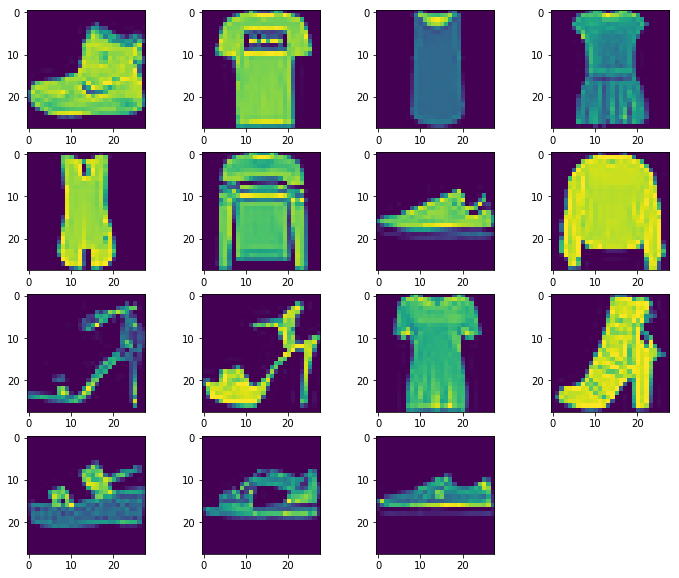

In [4]:
plt.figure(figsize=(12,10))# Showing the Input Data after Normalizing
x, y = 4, 4
for i in range(15):  
    plt.subplot(y, x, i+1)
    plt.imshow(X_train[i].reshape((28,28)),interpolation='nearest')
plt.show()

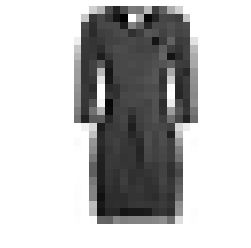

In [5]:
import matplotlib
import matplotlib.pyplot as plt
some_item = X_train[9000]
some_item_image = some_item.reshape(28, 28)
plt.imshow(some_item_image, cmap = matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [6]:
y_train[9000]

3

Training time: 0:00:01.581088
Train accuracy: 0.7893
Time to compute train accuracy: 0:00:23.601457 Train size: 60000
Test accuracy: 0.7584
Time to compute test accuracy: 0:00:05.424367 Test size: 10000


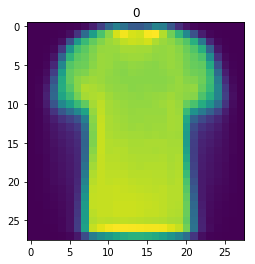

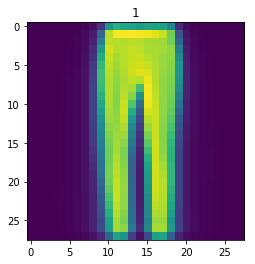

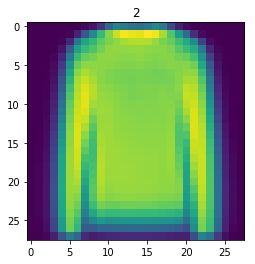

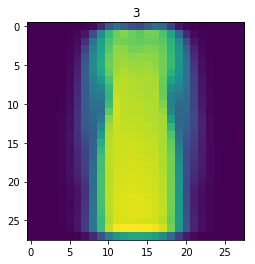

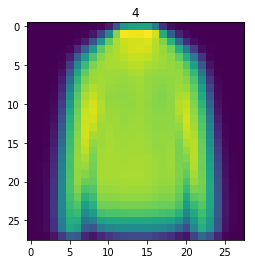

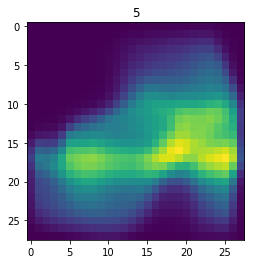

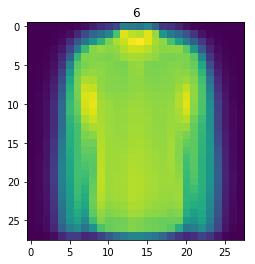

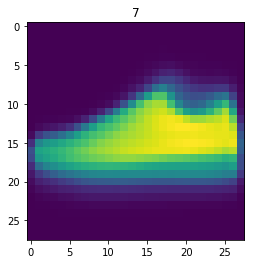

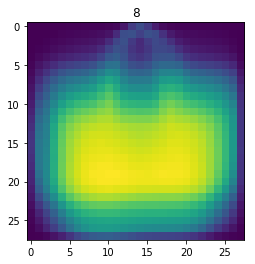

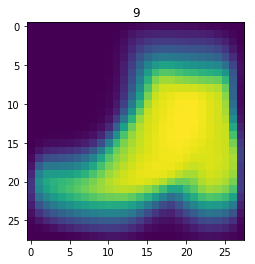

In [7]:
from future.utils import iteritems
from datetime import datetime
from scipy.stats import norm
from scipy.stats import multivariate_normal as mvn

class Bayes(object):
    def fit(self, X, Y, smoothing=1e-2):
        N, D = X.shape
        self.gaussians = dict()
        self.priors = dict()
        labels = set(Y)
        for c in labels:
            current_x = X[Y == c]
            self.gaussians[c] = {
                'mean': current_x.mean(axis=0),
                'cov': np.cov(current_x.T) + np.eye(D)*smoothing,
            }
            self.priors[c] = float(len(Y[Y == c])) / len(Y)

    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(P == Y)

    def predict(self, X):
        N, D = X.shape
        K = len(self.gaussians)
        P = np.zeros((N, K))
        for c, g in iteritems(self.gaussians):
            mean, cov = g['mean'], g['cov']
            P[:,c] = mvn.logpdf(X, mean=mean, cov=cov) + np.log(self.priors[c])
        return np.argmax(P, axis=1)


if __name__ == '__main__':
    #X, Y = get_data(10000)
    #Ntrain = len(Y) // 2
    #Xtrain, Ytrain = X[:Ntrain], Y[:Ntrain]
    #Xtest, Ytest = X[Ntrain:], Y[Ntrain:]

    Xtrain = X_train
    Xtest = X_test
    Ytrain =y_train
    Ytest = y_test
    
    model = Bayes()
    t0 = datetime.now()
    model.fit(Xtrain, Ytrain)
    print("Training time:", (datetime.now() - t0))

    t0 = datetime.now()
    print("Train accuracy:", model.score(Xtrain, Ytrain))
    print("Time to compute train accuracy:", (datetime.now() - t0), "Train size:", len(Ytrain))

    t0 = datetime.now()
    print("Test accuracy:", model.score(Xtest, Ytest))
    print("Time to compute test accuracy:", (datetime.now() - t0), "Test size:", len(Ytest))

    # plot the mean of each class
    for c, g in iteritems(model.gaussians):
        plt.imshow(g['mean'].reshape(28, 28))
        plt.title(c)
        plt.show()